In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
amoc=pd.read_csv('amoc_averaged.txt')
sst_annual = xr.open_dataset('tas_annual.nc')
st_annual = xr.open_dataset('ts_annual.nc')

'\nplt.figure()\nsns.set_palette([\'#7abe80\'])\nsns.set_style("darkgrid")\nsns.lineplot(data=global_mean,x="Year",y="tas")\nplt.ylabel("Average temp 2M below")\nplt.title("Annual Average Temperatures 2M Below Sea Surface over 1000 Years")\nglobal_mean.head()\n#plt.show()\nplt.savefig("lineplot_tas.png")\n\nplt.figure()\nplt.hist(global_mean["tas"])\nplt.title("Distribution of Temperatures 2m Below Sea Surface")\nplt.xlabel("Average temp 2M below")\n#plt.show()\nplt.savefig("histplot_tas.png")\n'

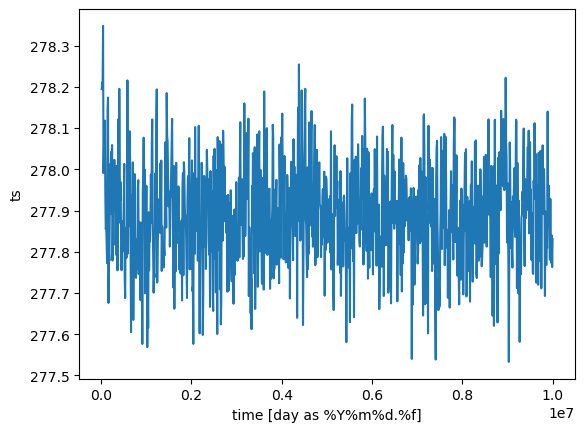

In [3]:
#global mean
global_mean = sst_annual.tas.mean(['lat','lon'])
st_mean = st_annual.ts.mean(['lat','lon'])
#change to years instead of time intervals
#global_mean['Year'] = list(range(0,999))
#st_mean['Year'] = list(range(0,999))

#global_mean.plot()
st_mean.plot()

'''
plt.figure()
sns.set_palette(['#7abe80'])
sns.set_style("darkgrid")
sns.lineplot(data=global_mean,x="Year",y="tas")
plt.ylabel("Average temp 2M below")
plt.title("Annual Average Temperatures 2M Below Sea Surface over 1000 Years")
global_mean.head()
#plt.show()
plt.savefig("lineplot_tas.png")

plt.figure()
plt.hist(global_mean["tas"])
plt.title("Distribution of Temperatures 2m Below Sea Surface")
plt.xlabel("Average temp 2M below")
#plt.show()
plt.savefig("histplot_tas.png")
'''

In [13]:
print(sst_n['tas'].unique())
print(np.min(sst_n['tas']))
print(sst_n['tas'].mode())
#sst_n.head()

[254.35176 260.13196 268.72482 ... 251.06987 241.5039  237.15872]
228.1768341064453
0    299.021423
1    299.992798
Name: tas, dtype: float32


In [15]:
print(sst_ocean['tas'].unique())
print(np.min(sst_ocean['tas']))
print(sst_ocean['tas'].mode())

[254.35176 260.13196 268.72482 ... 269.96362 267.30664 261.92664]
242.39865112304688
0    299.021423
1    299.503784
2    299.561523
3    299.987427
4    299.992798
Name: tas, dtype: float32


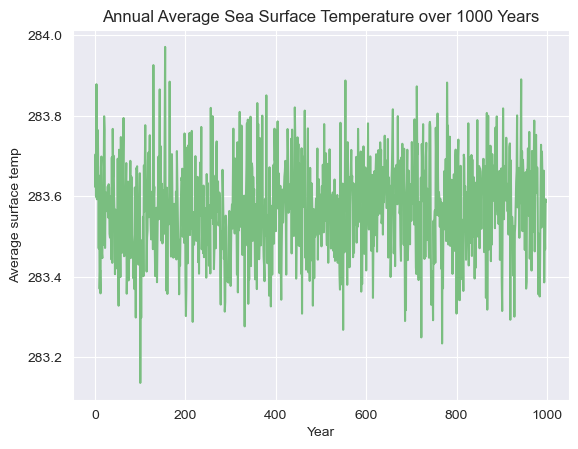

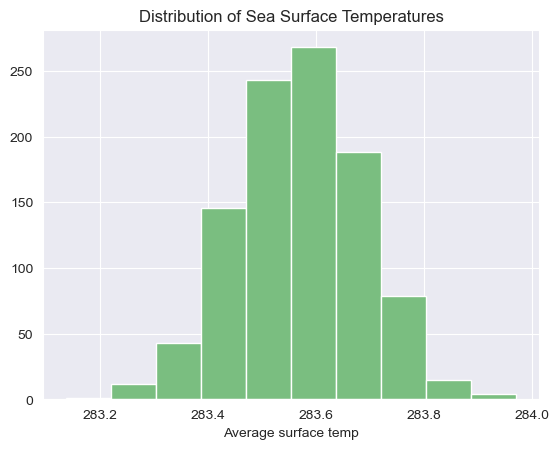

In [46]:
plt.figure()

sns.lineplot(data=st_mean,x="Year",y="ts")
plt.ylabel("Average surface temp")
plt.title("Annual Average Sea Surface Temperature over 1000 Years")
global_mean.head()
#plt.show()
plt.savefig("lineplot_ts.png")

plt.figure()
plt.hist(st_mean["ts"])
plt.title("Distribution of Sea Surface Temperatures")
plt.xlabel("Average surface temp")
#plt.show()
plt.savefig("histplot_ts.png")

In [37]:
amoc['Year'] = list(range(1,1001))

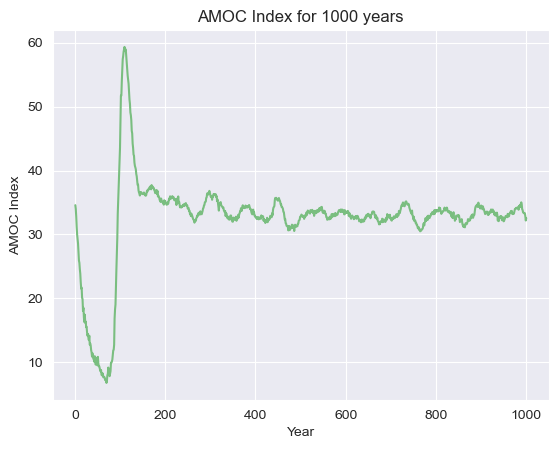

In [38]:
plt.figure()
sns.lineplot(data=amoc,x="Year",y="AMOC Index")
plt.title("AMOC Index for 1000 years")
plt.savefig("simulation_transient.png")

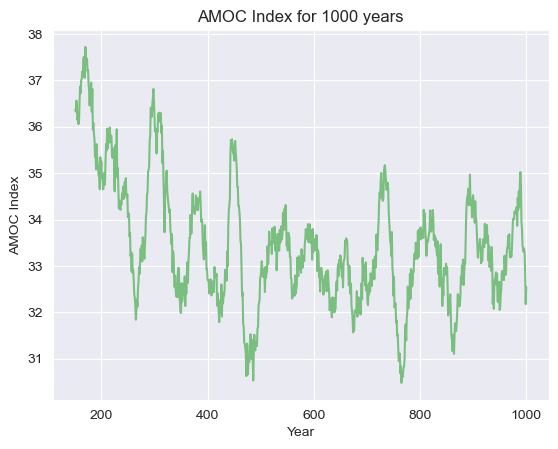

In [39]:
amoc_cut = amoc.loc[amoc["Year"]>150]
plt.figure()
sns.lineplot(data=amoc_cut,x="Year",y="AMOC Index")
plt.title("AMOC Index for 1000 years")
plt.savefig('simulation_notransient.png')

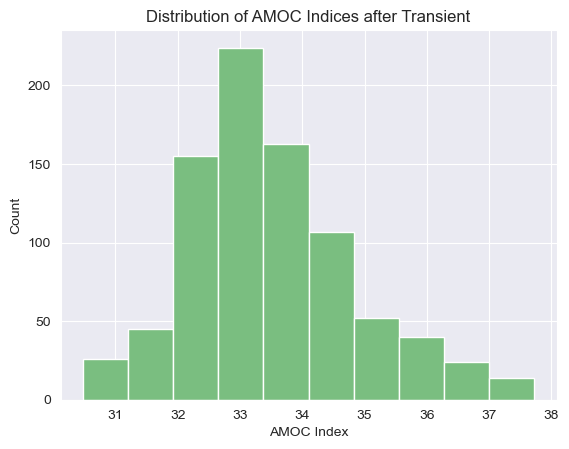

In [40]:
plt.hist(amoc_cut['AMOC Index'])
plt.title("Distribution of AMOC Indices after Transient")
plt.xlabel("AMOC Index")
plt.ylabel("Count")
plt.savefig('PDF_amoc_cut.png')